# Task 4 - Sales Prediction
<h3>Mageshwaran Sankar<h3>

## Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.DataFrame(pd.read_csv("advertising.csv"))

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [4]:
dataset.shape

(200, 4)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
dataset.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

## Data Cleaning

In [8]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
columns=dataset.columns.tolist()

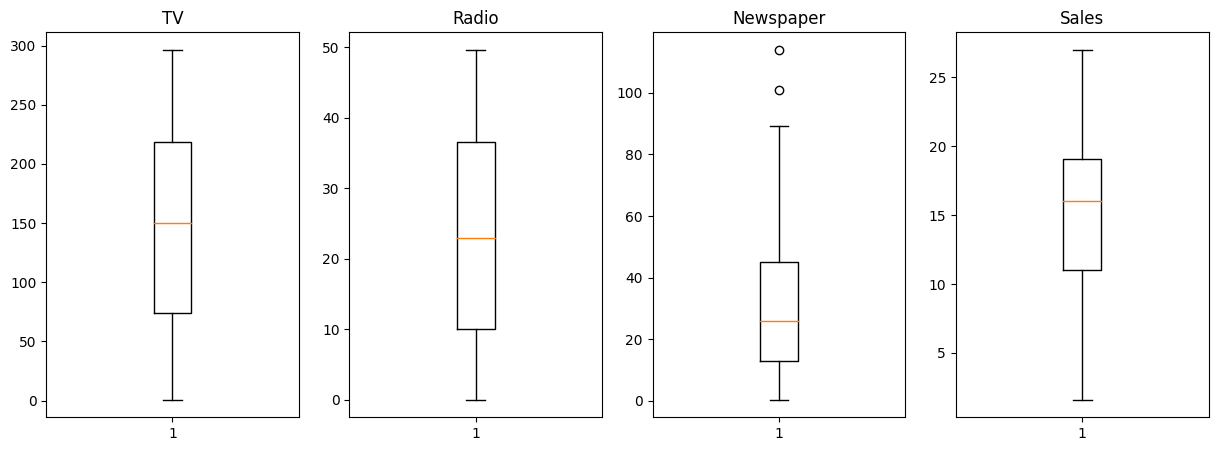

In [10]:
fig, axs = plt.subplots(ncols=4,nrows=1, figsize = (15,5))
for index,col in enumerate(columns):
    plt.subplot(1,4,index+1)
    plt.boxplot(dataset[col])
    axs[index].set_title(f"{col}")

## Exploratory Data Analysis

#### Sales (Target Variable)

In [11]:
target='Sales'

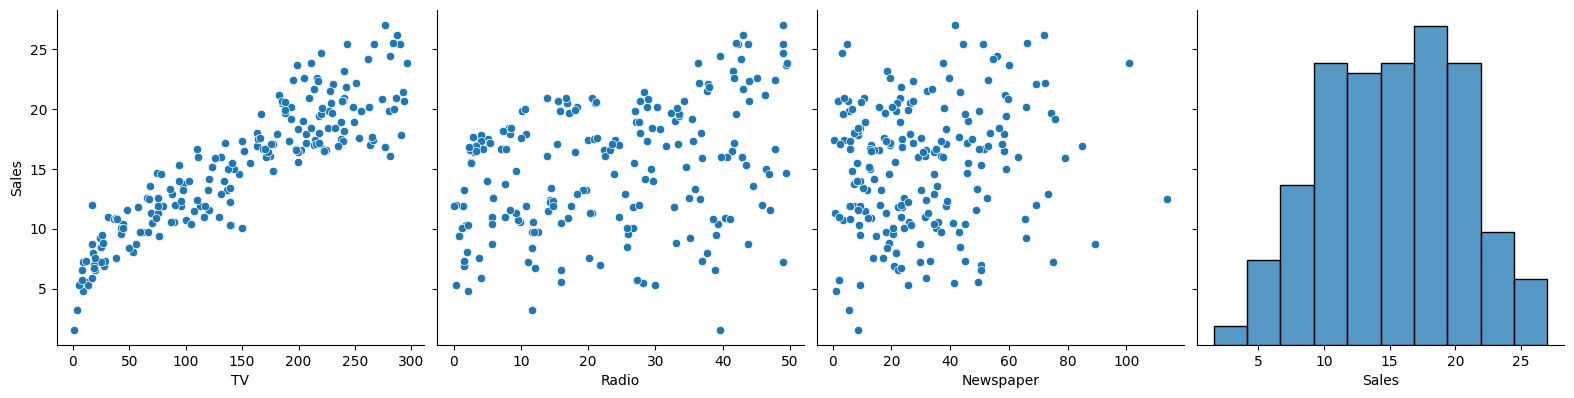

In [12]:
sns.pairplot(dataset, x_vars=dataset.columns.tolist().remove('Sales'), y_vars=target, height=4, aspect=1, kind='scatter')
plt.show()

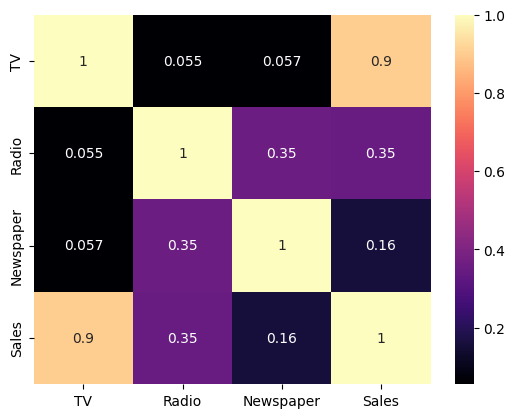

In [13]:
# Let's see the correlation between different variables.
sns.heatmap(dataset.corr(), cmap="magma", annot = True)
plt.show()

In [14]:
dataset.corr()['Sales'].sort_values()

Newspaper    0.157960
Radio        0.349631
TV           0.901208
Sales        1.000000
Name: Sales, dtype: float64

## Model Building

In [15]:
X = dataset.drop(columns=['Sales'],axis=1)
y = dataset['Sales']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

In [17]:
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [18]:
# Let's now take a look at the train dataset

X_train.head()

,TV,Radio,Newspaper
168,215.4,23.6,57.6
112,175.7,15.4,2.4
171,164.5,20.9,47.4
181,218.5,5.4,27.4
7,120.2,19.6,11.6


In [19]:
y_train.head()

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
Name: Sales, dtype: float64

#### Building a Linear Model

In [20]:
import statsmodels.api as sm

In [21]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [22]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const        4.419177
TV           0.053737
Radio        0.106142
Newspaper    0.005422
dtype: float64

In [23]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     535.5
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           7.01e-82
Time:                        11:18:04   Log-Likelihood:                -303.50
No. Observations:                 160   AIC:                             615.0
Df Residuals:                     156   BIC:                             627.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4192      0.329     13.428      0.0

####  Looking at some key statistics from the summary

In [24]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [25]:
columns=dataset.columns.tolist()

In [26]:
columns.pop()

'Sales'

In [41]:
columns


['TV', 'Radio', 'Newspaper']

In [27]:
train=pd.concat([X_train,y_train],axis=1)


In [28]:
train

,TV,Radio,Newspaper,Sales
168,215.4,23.6,57.6,17.1
112,175.7,15.4,2.4,17.1
171,164.5,20.9,47.4,17.5
181,218.5,5.4,27.4,17.2
7,120.2,19.6,11.6,13.2
...,...,...,...,...
87,110.7,40.6,63.2,16.0
103,187.9,17.2,17.9,19.7
67,139.3,14.5,10.2,13.4
24,62.3,12.6,18.3,9.7


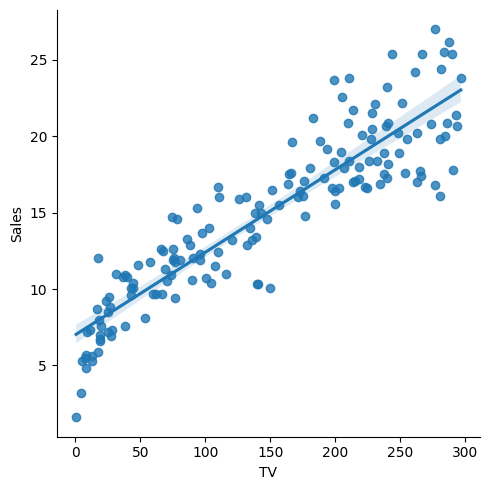

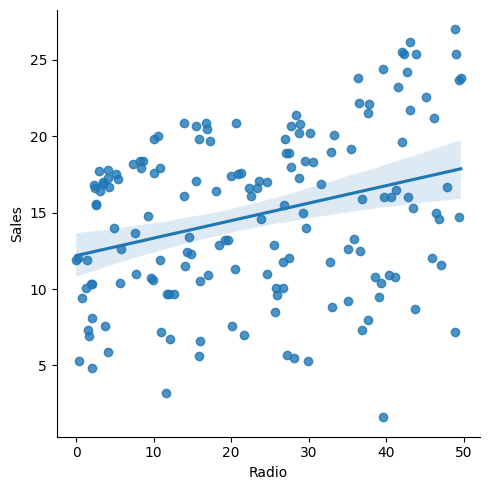

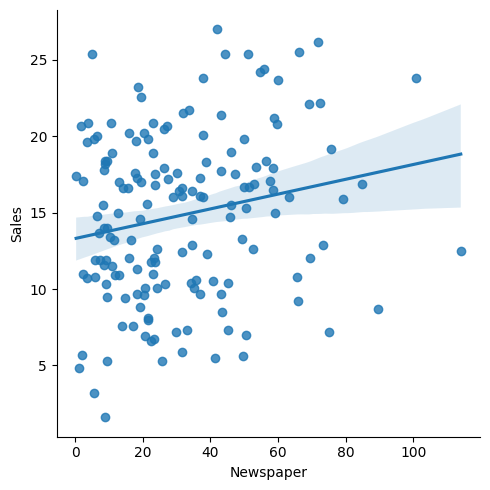

In [29]:
for index,col in enumerate(columns):
    sns.lmplot(train,x=col,y=target)
    plt.tight_layout()

## Model Evaluation

In [30]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

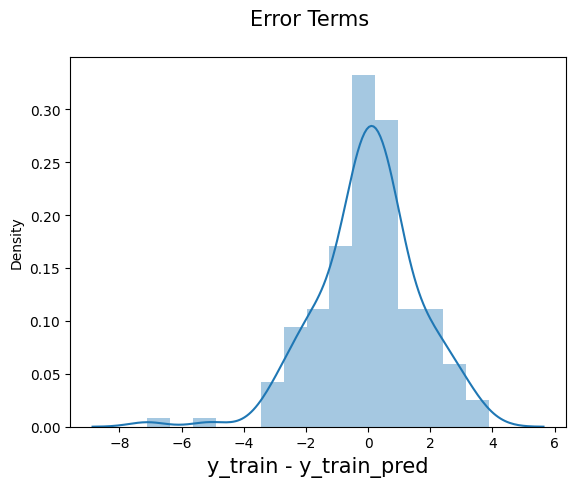

In [31]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#### Looking for patterns in the residuals

In [32]:
len(X_train['TV'])

160

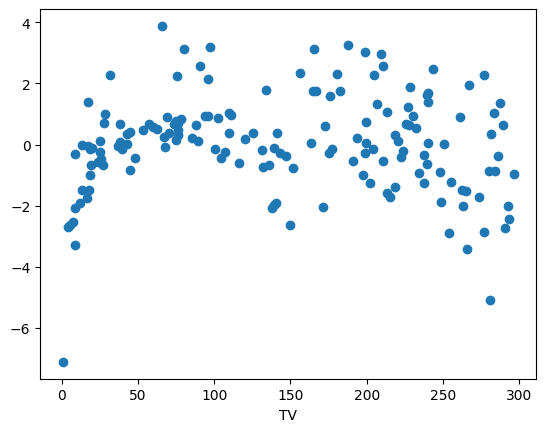

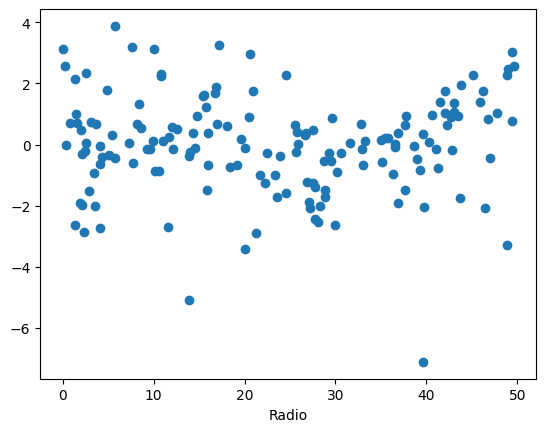

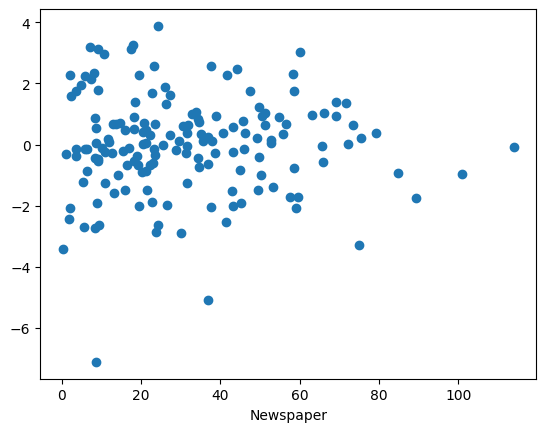

In [33]:

for i in X_train.columns:
    plt.scatter(X_train[i],res)
    plt.xlabel(f'{i}')
    plt.show()

### Predictions on the Test Set

In [34]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [35]:
y_pred.head()

126     9.241562
104    20.888632
99     16.359323
92     19.993256
111    21.566480
dtype: float64

# Evaluation

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Looking at the RMSE

In [37]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1.8305705999303

Checking the R-squared on the test set

In [38]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8296690596780842

##### Visualizing the fit on the test set

In [39]:
test=pd.concat([X_test,y_test],axis=1)

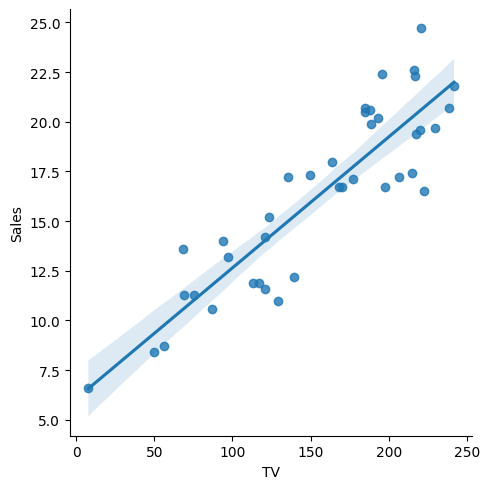

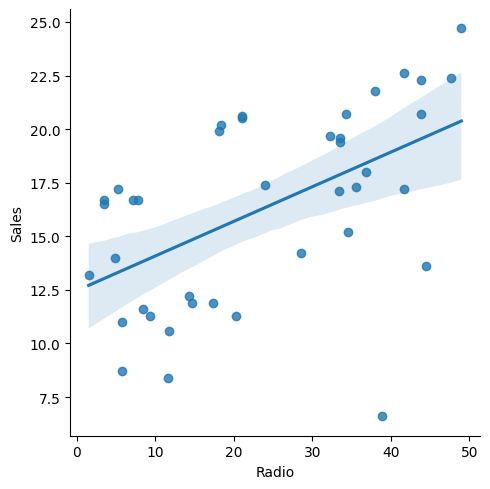

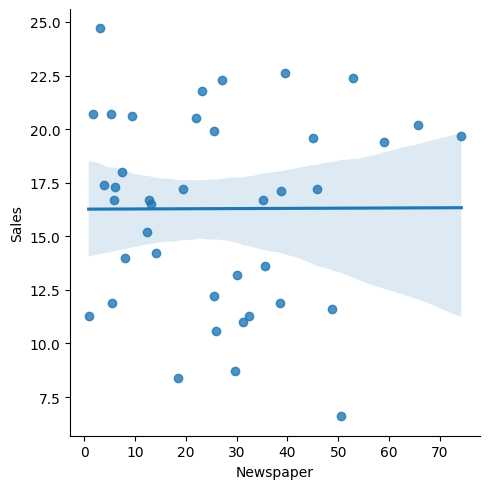

In [40]:
for i in columns:
    sns.lmplot(test,x=i,y=target)
    plt.show()

In [40]:
`

Therefore, our model's accuracy is approximately 83%